### Stock Market Prediction And Forecasting Using Stacked LSTM

In [83]:
### Data Collection
import tiingo
import pandas_datareader as pdr

In [84]:
key="Tingo Key"

StockName = 'AAPL'

FileName = 'AAPL.csv'

time_step = 100

DaysToPredict = 30

In [85]:
client = tiingo.TiingoClient({'api_key': key})
df = client.get_dataframe(StockName, startDate='2020-01-01', endDate='2024-01-01')

In [86]:
df.to_csv(FileName)

In [87]:
import pandas as pd

In [88]:
df=pd.read_csv(FileName)

In [89]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2020-01-02 00:00:00+00:00,300.35,300.60,295.19,296.24,33911864,72.797293,72.857887,71.546639,71.801132,135647456,0.0,1.0
1,2020-01-03 00:00:00+00:00,297.43,300.58,296.50,297.15,36633878,72.089558,72.853039,71.864150,72.021693,146535512,0.0,1.0
2,2020-01-06 00:00:00+00:00,299.80,299.96,292.75,293.79,29644644,72.663987,72.702767,70.955244,71.207314,118578576,0.0,1.0
3,2020-01-07 00:00:00+00:00,298.39,300.90,297.48,299.84,27877655,72.322238,72.930599,72.101677,72.673682,111510620,0.0,1.0
4,2020-01-08 00:00:00+00:00,303.19,304.44,297.16,297.16,33090946,73.485638,73.788606,72.024117,72.024117,132363784,0.0,1.0


In [90]:
df.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1001,2023-12-22 00:00:00+00:00,193.60,195.41,192.970,195.18,37149570,192.656691,194.457872,192.029760,194.228992,37149570,0.0,1.0
1002,2023-12-26 00:00:00+00:00,193.05,193.89,192.830,193.61,28919310,192.109371,192.945278,191.890442,192.666642,28919310,0.0,1.0
1003,2023-12-27 00:00:00+00:00,193.15,193.50,191.090,192.49,47899806,192.208883,192.557178,190.158921,191.552099,47899806,0.0,1.0
1004,2023-12-28 00:00:00+00:00,193.58,194.66,193.170,194.14,34049898,192.636788,193.711526,192.228786,193.194060,34049898,0.0,1.0
1005,2023-12-29 00:00:00+00:00,192.53,194.40,191.725,193.90,42672148,191.591904,193.452793,190.790827,192.955229,42672148,0.0,1.0


In [91]:
len(df)

1006

In [92]:
df1=df.reset_index()['close']

In [93]:
df1

0       300.35
1       297.43
2       299.80
3       298.39
4       303.19
         ...  
1001    193.60
1002    193.05
1003    193.15
1004    193.58
1005    192.53
Name: close, Length: 1006, dtype: float64

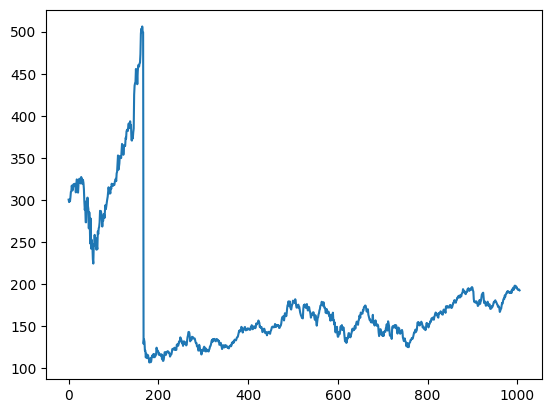

In [94]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [95]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [96]:
import numpy as np

In [97]:
df1

0       300.35
1       297.43
2       299.80
3       298.39
4       303.19
         ...  
1001    193.60
1002    193.05
1003    193.15
1004    193.58
1005    192.53
Name: close, Length: 1006, dtype: float64

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [99]:
print(df1)

[[0.48468378]
 [0.47737007]
 [0.4833062 ]
 ...
 [0.21618034]
 [0.21725736]
 [0.21462743]]


In [100]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [101]:
training_size,test_size

(653, 353)

In [102]:
train_data

array([[4.84683782e-01],
       [4.77370069e-01],
       [4.83306199e-01],
       [4.79774577e-01],
       [4.91797120e-01],
       [5.07927364e-01],
       [5.09680651e-01],
       [5.26286788e-01],
       [5.15566688e-01],
       [5.12210394e-01],
       [5.21978710e-01],
       [5.30720100e-01],
       [5.25309956e-01],
       [5.28140263e-01],
       [5.31972448e-01],
       [5.29668128e-01],
       [5.06224170e-01],
       [5.28115216e-01],
       [5.44771446e-01],
       [5.43594239e-01],
       [5.07626800e-01],
       [5.05497808e-01],
       [5.31020664e-01],
       [5.37532874e-01],
       [5.46950532e-01],
       [5.33976205e-01],
       [5.37783344e-01],
       [5.32924233e-01],
       [5.51934878e-01],
       [5.46098936e-01],
       [5.46299311e-01],
       [5.31396368e-01],
       [5.42968065e-01],
       [5.34652473e-01],
       [5.16493425e-01],
       [4.79248591e-01],
       [4.53951158e-01],
       [4.65397621e-01],
       [4.17482780e-01],
       [4.17082029e-01],


In [103]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [104]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4

X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [105]:
print(X_train.shape), print(y_train.shape)

(552, 100)
(552,)


(None, None)

In [106]:
print(X_test.shape), print(ytest.shape)

(252, 100)
(252,)


(None, None)

In [107]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [108]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [109]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) # 100 time steps and 1 feature
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


d:\Apps\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [110]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - loss: 0.0391 - val_loss: 3.9025e-04
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0143 - val_loss: 9.1353e-04
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0115 - val_loss: 7.6754e-04
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0121 - val_loss: 3.8214e-04
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0091 - val_loss: 0.0011
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0140 - val_loss: 3.1604e-04
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0083 - val_loss: 6.8331e-04
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0122 - val_loss: 1.7908e-04
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.0071 - val_loss: 2.5143e-04
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0097 - val_loss: 4.0014e-04
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0079 - val_loss: 9.0752e-04
Epoch 12/100
9/9 ━━━━━━━━━━━━━━

In [112]:
import tensorflow as tf

In [113]:
tf.__version__

'2.18.0'

In [114]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [115]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [116]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict)) #train_predict is the predicted value of training data

192.57355789950267

In [117]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict)) #test_predict is the predicted value of test data

169.07261850546348

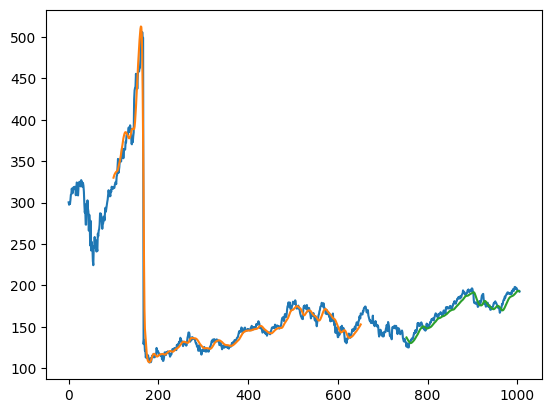

In [118]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [119]:
len(test_data)

353

In [120]:
indexValue = len(test_data)-100 #100 is the time step value

x_input=test_data[indexValue:].reshape(1,-1)
x_input.shape


(1, 100)

In [121]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [122]:
temp_input

[0.1787100814026299,
 0.17815904821540385,
 0.17770820288040068,
 0.18189104571070758,
 0.1768566061365059,
 0.1746524733876017,
 0.16821540388227924,
 0.16944270507200998,
 0.17282404508453347,
 0.17630557294927984,
 0.18604884157795865,
 0.17417658108954281,
 0.17976205385097055,
 0.18371947401377575,
 0.1935629304946775,
 0.20240450845335,
 0.20295554164057605,
 0.20693800876643703,
 0.20753913587977452,
 0.19053224796493418,
 0.1771321227301189,
 0.17868503443957418,
 0.18164057608015027,
 0.17397620538509706,
 0.16874139010644956,
 0.17257357545397617,
 0.17074514715090788,
 0.17815904821540385,
 0.18091421415153408,
 0.17194740137758296,
 0.16804007514088914,
 0.17019411396368184,
 0.173425172197871,
 0.16310582341891044,
 0.15927363807138384,
 0.15992485911083276,
 0.16122730118973072,
 0.16758922980588598,
 0.16420788979336254,
 0.1673638071383844,
 0.17049467752035058,
 0.17695679398872882,
 0.18071383844708827,
 0.17921102066374445,
 0.18274264245460237,
 0.1850219160926737,


In [123]:
# demonstrate prediction for next x days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<DaysToPredict):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.21468675]
101
1 day input [0.17815905 0.1777082  0.18189105 0.17685661 0.17465247 0.1682154
 0.16944271 0.17282405 0.17630557 0.18604884 0.17417658 0.17976205
 0.18371947 0.19356293 0.20240451 0.20295554 0.20693801 0.20753914
 0.19053225 0.17713212 0.17868503 0.18164058 0.17397621 0.16874139
 0.17257358 0.17074515 0.17815905 0.18091421 0.1719474  0.16804008
 0.17019411 0.17342517 0.16310582 0.15927364 0.15992486 0.1612273
 0.16758923 0.16420789 0.16736381 0.17049468 0.17695679 0.18071384
 0.17921102 0.18274264 0.18502192 0.18036318 0.18003757 0.1761052
 0.17282405 0.17187226 0.16541014 0.16571071 0.16681277 0.16095178
 0.15040701 0.15373826 0.15892298 0.16012523 0.16814026 0.17715717
 0.17485285 0.18131497 0.18780213 0.19048215 0.1892799  0.19927364
 0.19526612 0.20187852 0.2033062  0.20756418 0.20751409 0.21192235
 0.20989355 0.2115717  0.2082154  0.20776456 0.20929242 0.20671259
 0.20816531 0.21139637 0.20686287 0.21685661 0.21410144 0.2189856
 0.22259236 0.21625548 0.22008766 0.2

In [124]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [125]:
import matplotlib.pyplot as plt

In [126]:
len(df1)

1006

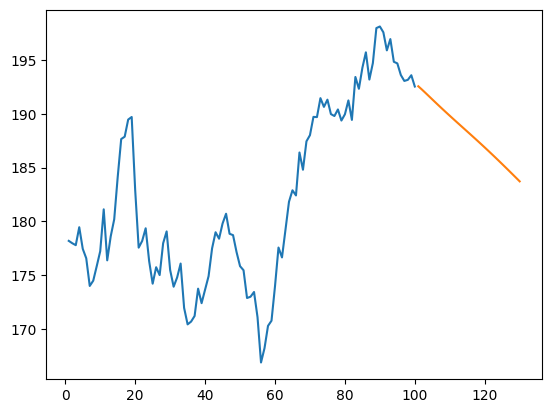

In [127]:
prvData = len(df1)-100

plt.plot(day_new,scaler.inverse_transform(df1[prvData:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

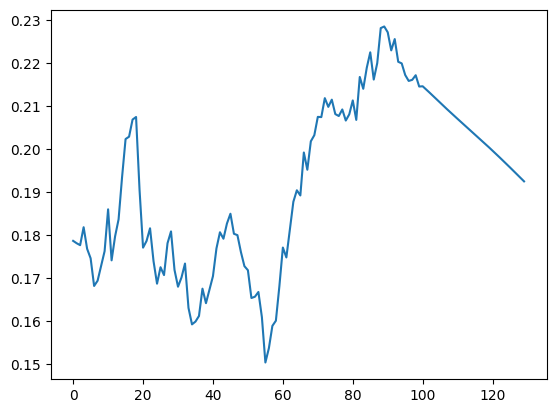

In [128]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[prvData:])

In [129]:
df3=scaler.inverse_transform(df3).tolist()

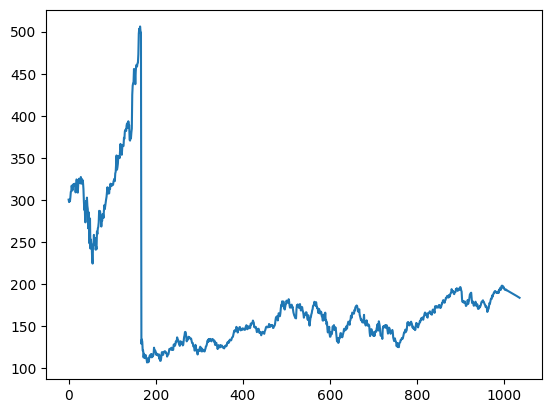

In [130]:
plt.plot(df3)

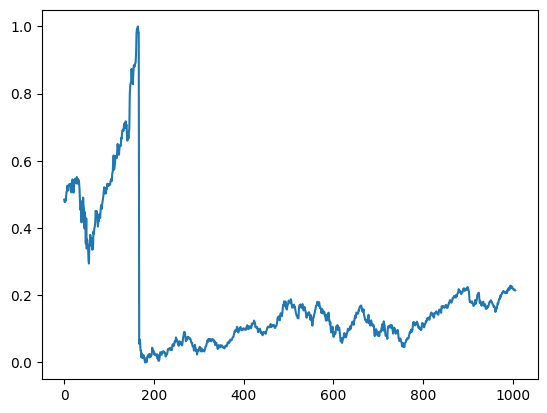

In [131]:
plt.plot(df1)